In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.colors import LogNorm


In [2]:
file_path_1 = "/fast_scratch/QVAE/data/atlas_dataset2and3/dataset_2_1.hdf5"
data_dict_1 = {}
# Open the HDF5 file
with h5py.File(file_path_1, 'r') as file:
    # List all groups
    print("Keys: %s" % file.keys())
    for key in file.keys():
        data_dict_1[key] = torch.tensor(file[key][:])

Keys: <KeysViewHDF5 ['incident_energies', 'showers']>


In [3]:
file_path_s = "/fast_scratch/QVAE/syn_data/wise-tree-1429.hdf5"
data_dict_s = {}
# Open the HDF5 file
with h5py.File(file_path_s, 'r') as file:
    # List all groups
    print("Keys: %s" % file.keys())
    for key in file.keys():
        data_dict_s[key] = torch.tensor(file[key][:])

Keys: <KeysViewHDF5 ['incidence energy', 'showers']>


In [4]:
incident_1 = data_dict_1['incident_energies']
showers_1 = data_dict_1['showers']
incident_s = data_dict_s['incidence energy']
showers_s = data_dict_s['showers']
print(incident_s.shape)
print(showers_s.shape)
print(incident_1.shape)
print(showers_1.shape)

torch.Size([100000, 1])
torch.Size([100000, 6480])
torch.Size([100000, 1])
torch.Size([100000, 6480])


In [45]:
filtered_mask_1 = (incident_1 >= 1) & (incident_1 <= 1000000)
filtered_indexes_1 = torch.nonzero(filtered_mask_1, as_tuple=False)
filtered_showers_1 = showers_1[filtered_indexes_1[:, 0]]
print("Size of filtered DS2 showers", filtered_showers_1.size())
filtered_mask_s = (incident_s >= 1) & (incident_s <= 1000000)
filtered_indexes_s = torch.nonzero(filtered_mask_s, as_tuple=False)
filtered_showers_s = showers_s[filtered_indexes_s[:, 0]]
print("Size of filtered syn showers", filtered_showers_s.size())

Size of filtered DS2 showers torch.Size([100000, 6480])
Size of filtered syn showers torch.Size([100000, 6480])


In [47]:
reshaped_showers_1 = filtered_showers_1.view(100000, 45, 144)
condensed_tensor_1 = torch.sum(reshaped_showers_1, dim=2)

reshaped_showers_s = filtered_showers_s.view(100000, 45, 144)
condensed_tensor_s = torch.sum(reshaped_showers_s, dim=2)

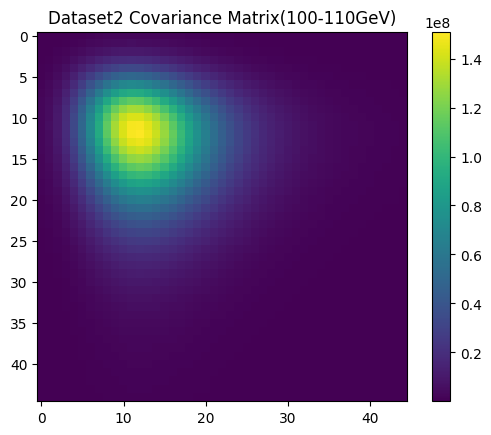

In [48]:
showers_m_1 = condensed_tensor_1 - condensed_tensor_1.mean(dim=0)
M61_torch = torch.matmul(showers_m_1.t(), showers_m_1) / showers_m_1.size(0)
M61 = M61_torch.numpy()
plt.imshow(M61, cmap='viridis', interpolation='nearest')
plt.colorbar() 
plt.title('Dataset2 Covariance Matrix(100-110GeV)')
plt.show()

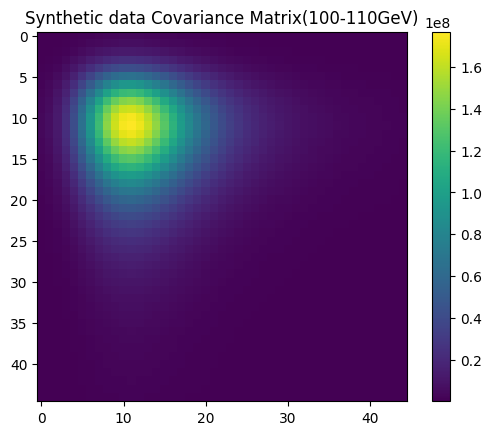

In [49]:
showers_m_s = condensed_tensor_s - condensed_tensor_s.mean(dim=0)
M6s_torch = torch.matmul(showers_m_s.t(), showers_m_s) / showers_m_s.size(0)
M6s = M6s_torch.numpy()
plt.imshow(M6s, cmap='viridis', interpolation='nearest')
plt.colorbar() 
plt.title('Synthetic data Covariance Matrix(100-110GeV)')
plt.show()

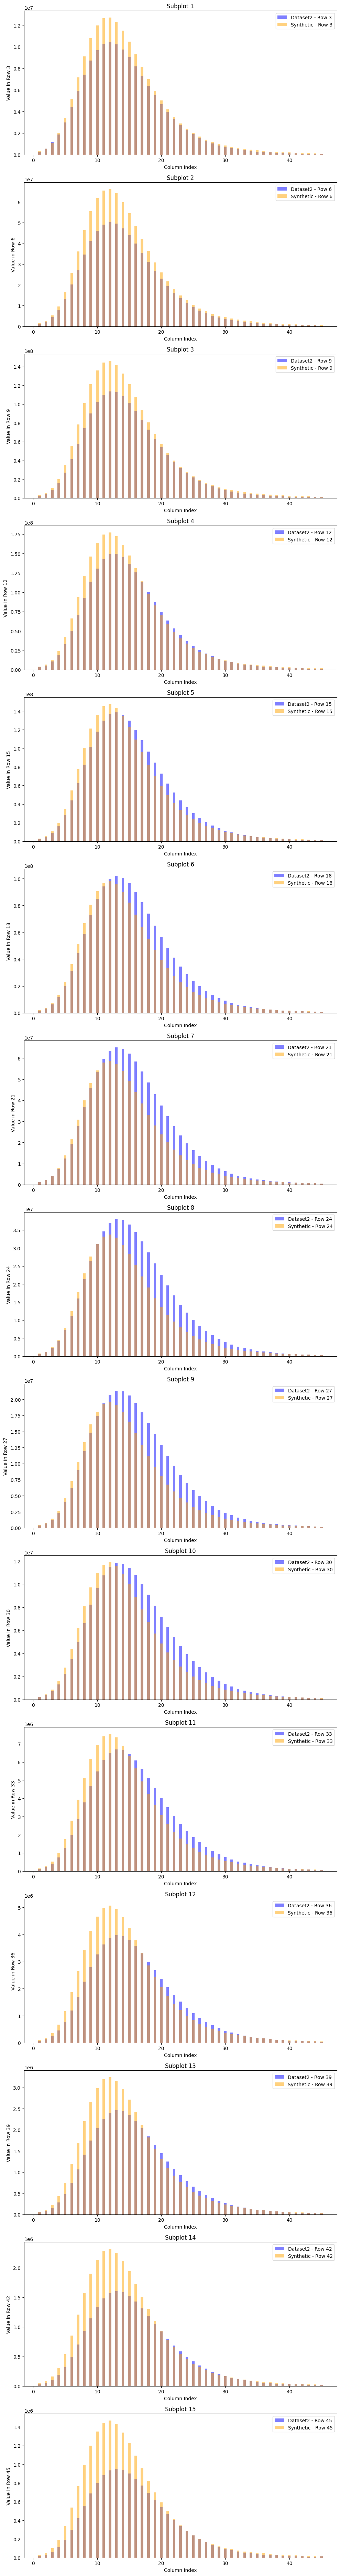

In [10]:
rows_to_plot1 = M61[2::3, :]
rows_to_plot2 = M6s[2::3, :]
max_value = 750000
# Create x-axis values (bars representing the columns)
x_values = np.arange(1, 46)

# Number of subplots
num_subplots = len(rows_to_plot1)

# Set up subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 5 * num_subplots))

# Plot histograms for every third row in each subplot
for i, (row_to_plot1, row_to_plot2) in enumerate(zip(rows_to_plot1, rows_to_plot2)):
    axes[i].bar(x_values, row_to_plot1, alpha=0.5, label=f'Dataset2 - Row {3*i + 3}', color='blue', width=0.4)
    axes[i].bar(x_values, row_to_plot2, alpha=0.5, label=f'Synthetic - Row {3*i + 3}', color='orange', width=0.4)

    # Adding labels and title to each subplot
    axes[i].set_xlabel('Column Index')
    axes[i].set_ylabel(f'Value in Row {3*i + 3}')
    axes[i].set_title(f'Subplot {i + 1}')

    # Displaying legend
    axes[i].legend()


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
print(condensed_matrix_s.shape)

(45, 45)
